# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [2035]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2038]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [2043]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], format='%Y-%m-%d %H:%M:%S')

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [2046]:
# Convert categorical features to category type
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [2050]:
# Calculate time taken in minutes
df['time_taken_in_mins'] = (df['actual_delivery_time']-df['created_at']).dt.total_seconds()/60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [2053]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.day_of_week

# Create a categorical feature 'isWeekend'
df['is_weekend'] = df['created_at'].dt.day_of_week >=5
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_in_mins  hour  day_of_week  \
0                      21.0     34.44                47.0    22            4   
1                       2.0     27.60                44.0    21            1   
2                      18.0     11.56                55.0     0            0   
3                       8.0     31.80                59.0     3            3   
4                       7.0      8.20                46.0     2            1   

   is_weekend  
0       False  
1       False  
2       False  
3       False  
4       False

In [2055]:
# check if there are scenarios where there are no dashers, those rows should be invalid
df = df[df['total_busy_dashers'] + df['total_onshift_dashers'] > 0]

In [2057]:
# Drop unnecessary columns
df = df.drop(labels = ['created_at', 'actual_delivery_time', 'day_of_week'], axis = 1)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [2061]:
# Define target variable (y) and features (X)
y = df['time_taken_in_mins']
X = df.drop('time_taken_in_mins', axis = 1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [2064]:
# Split data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print(df_train.shape)
print(df_test.shape)

(137810, 15)
(34453, 15)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [2068]:
# Define numerical and categorical columns for easy EDA and data manipulation


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [2071]:
df_train.head()

market_id store_primary_category order_protocol  total_items  \
127781        2.0                     39            1.0            5   
127223        4.0                     55            1.0            1   
73315         2.0                     72            1.0            2   
125157        2.0                     24            1.0            3   
12776         2.0                      4            3.0            3   

        subtotal  num_distinct_items  min_item_price  max_item_price  \
127781      6575                   3             995            1395   
127223      1715                   1            1365            1365   
73315       1725                   2             775             850   
125157      1985                   2             595             695   
12776       1577                   3              89            1209   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
127781                   36.0                56.0                      38.0   
127223                   83.0                83.0                     148.0   
73315                   104.0                91.0                     125.0   
125157                  134.0               116.0                     187.0   
12776                    23.0                24.0                      37.0   

        distance  time_taken_in_mins  hour  is_weekend  
127781     28.72                46.0    21        True  
127223     21.28                60.0     2        True  
73315       8.12                43.0     1        True  
125157     26.92                50.0     2       False  
12776      21.80                43.0    22       False

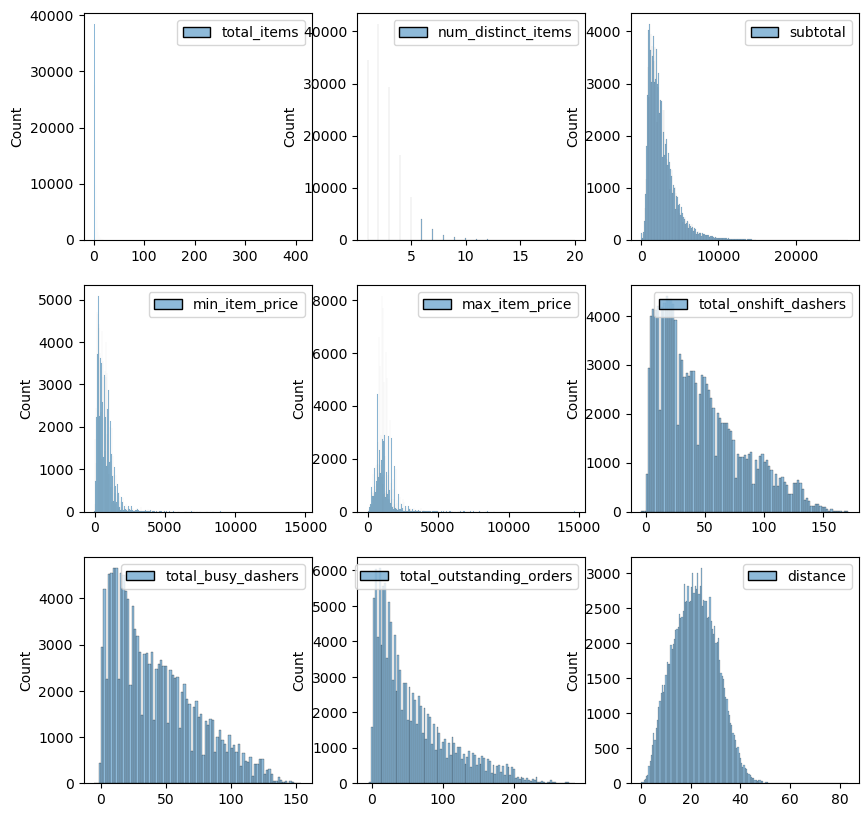

In [2073]:
# Plot distributions for all numerical columns
fig, axes = plt.subplots(3, 3,figsize=(10, 10))
sns.histplot(df_train[['total_items']], ax=axes[0][0])
sns.histplot(df_train[['num_distinct_items']], ax=axes[0][1])
sns.histplot(df_train[['subtotal']], ax=axes[0][2])
sns.histplot(df_train[['min_item_price']], ax=axes[1][0])
sns.histplot(df_train[['max_item_price']], ax=axes[1][1])
sns.histplot(df_train[['total_onshift_dashers']], ax=axes[1][2])
sns.histplot(df_train[['total_busy_dashers']], ax=axes[2][0])
sns.histplot(df_train[['total_outstanding_orders']], ax=axes[2][1])
sns.histplot(df_train[['distance']], ax=axes[2][2])

plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

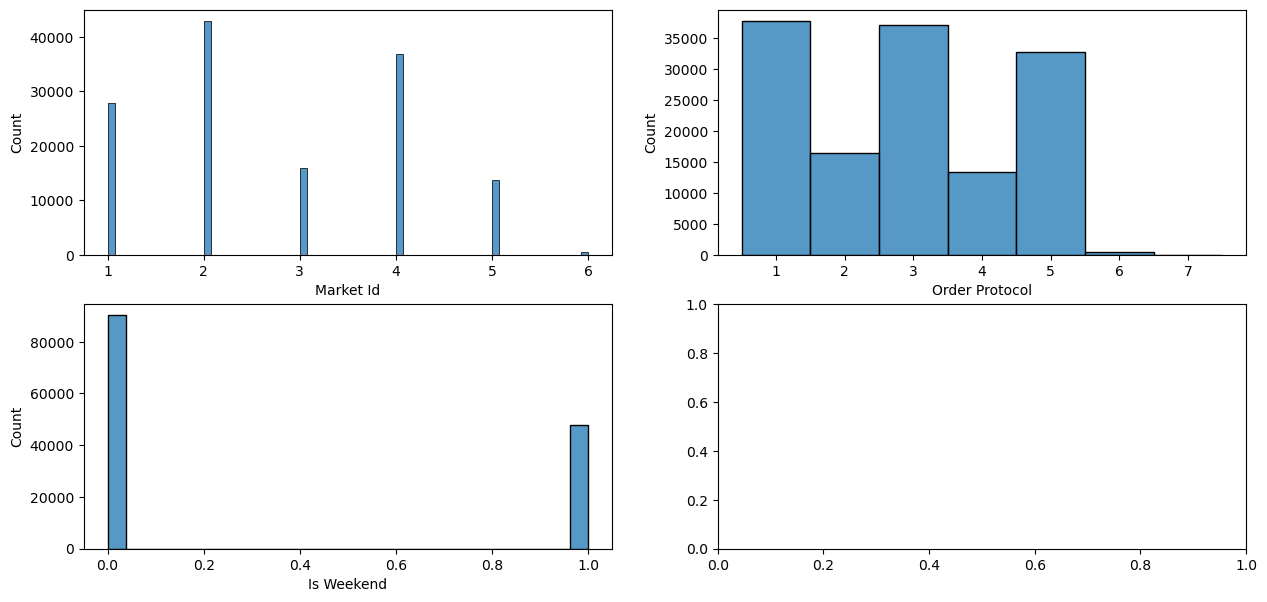

In [2076]:
# Distribution of categorical columns
fig, axes = plt.subplots(2, 2, figsize=(15, 7)) # Adjust figure size for better view 

sns.histplot(data=df_train['market_id'], ax=axes[0][0])
axes[0][0].set_xlabel('Market Id')

sns.histplot(data=df_train['order_protocol'], ax=axes[0][1])
axes[0][1].set_xlabel('Order Protocol')

sns.histplot(data=df_train['is_weekend'], ax=axes[1][0])
axes[1][0].set_xlabel('Is Weekend')

plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

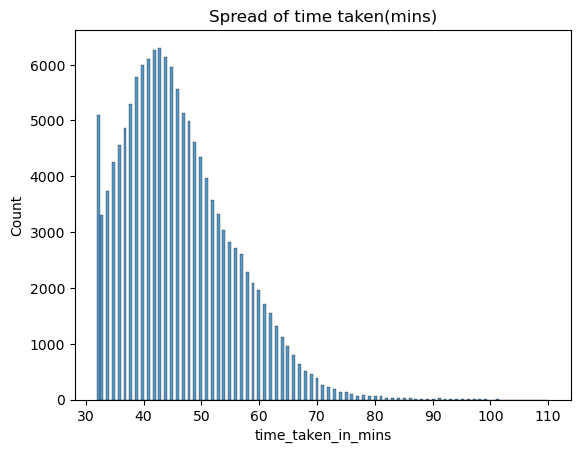

In [2079]:
# Distribution of time_taken
sns.histplot(df_train['time_taken_in_mins'])
plt.title('Spread of time taken(mins)')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

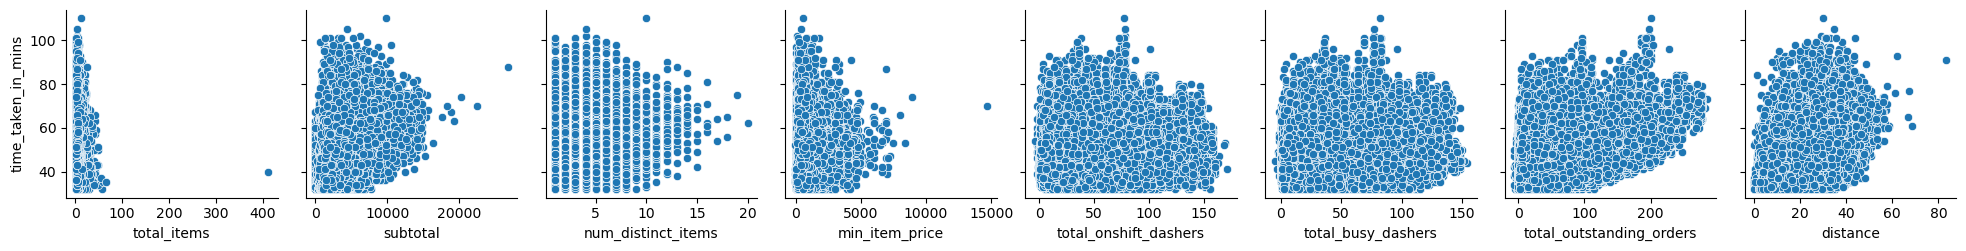

In [2083]:
# Scatter plot to visualise the relationship between time_taken and other features

sns.pairplot(df_train, x_vars=['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'total_onshift_dashers', 
                         'total_busy_dashers', 'total_outstanding_orders', 'distance'], y_vars=['time_taken_in_mins'])
plt.show()

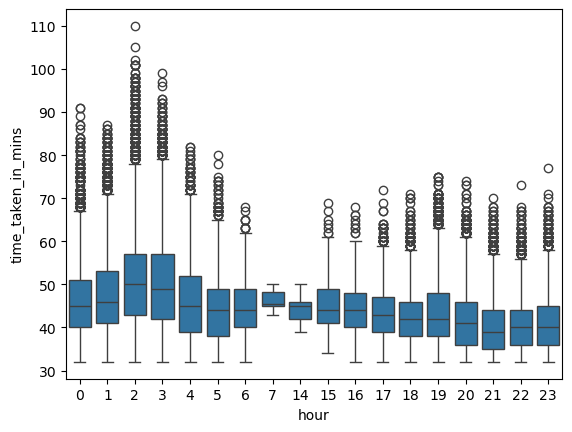

In [2085]:
# Show the distribution of time_taken for different hours
sns.boxplot(df_train, x='hour', y='time_taken_in_mins')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

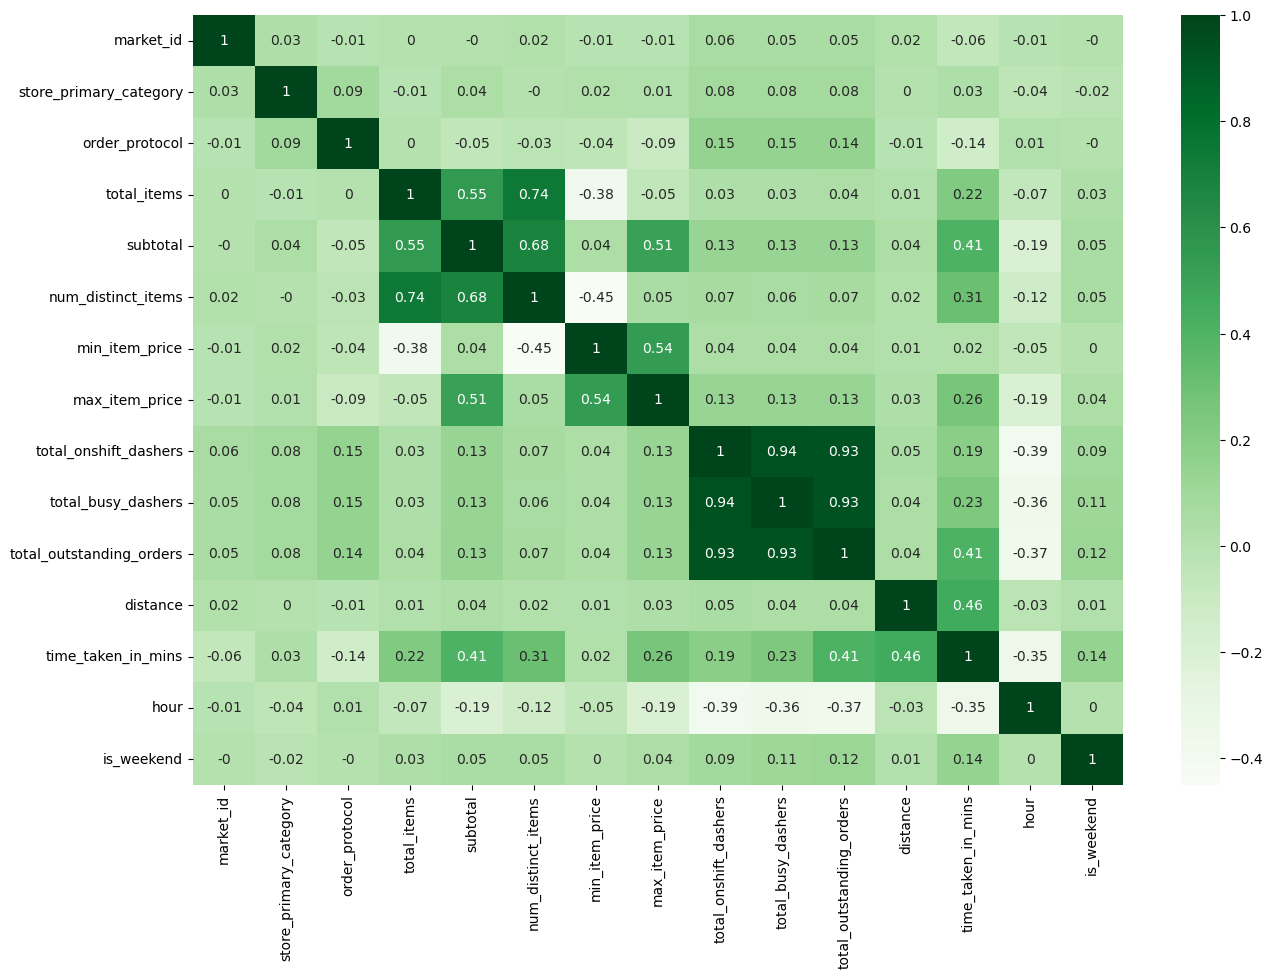

In [2089]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df_train.corr().round(2), annot=True, cmap = 'Greens')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [2092]:
# Drop 3-5 weakly correlated columns from training dataset
df_train = df_train.drop(columns=['market_id', 'store_primary_category', 'min_item_price', 'order_protocol', 
                                  'is_weekend'])

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

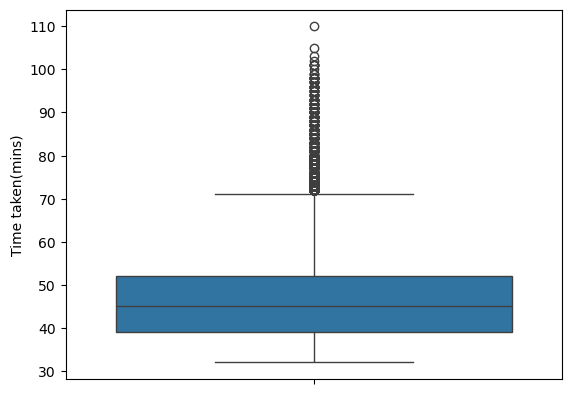

In [2096]:
# Boxplot for time_taken
sns.boxplot(df['time_taken_in_mins'])
plt.ylabel('Time taken(mins)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

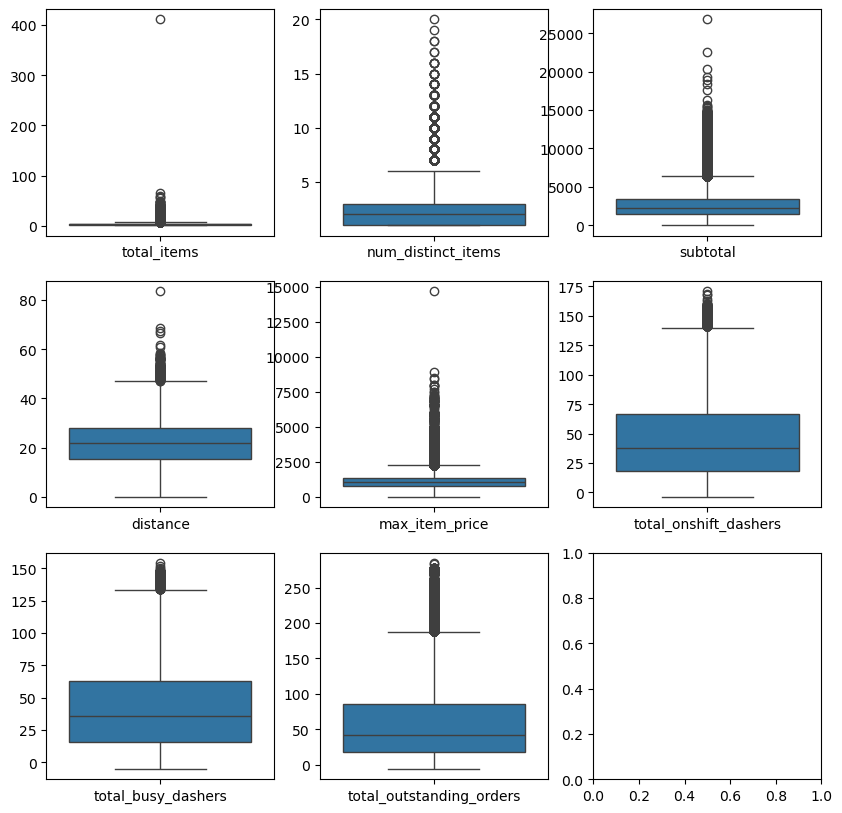

In [2099]:
# Handle outliers
fig, axes = plt.subplots(3, 3,figsize=(10, 10))

sns.boxplot(df_train[['total_items']], ax=axes[0][0])
sns.boxplot(df_train[['num_distinct_items']], ax=axes[0][1])
sns.boxplot(df_train[['subtotal']], ax=axes[0][2])
sns.boxplot(df_train[['distance']], ax=axes[1][0])
sns.boxplot(df_train[['max_item_price']], ax=axes[1][1])
sns.boxplot(df_train[['total_onshift_dashers']], ax=axes[1][2])
sns.boxplot(df_train[['total_busy_dashers']], ax=axes[2][0])
sns.boxplot(df_train[['total_outstanding_orders']], ax=axes[2][1])

plt.show()

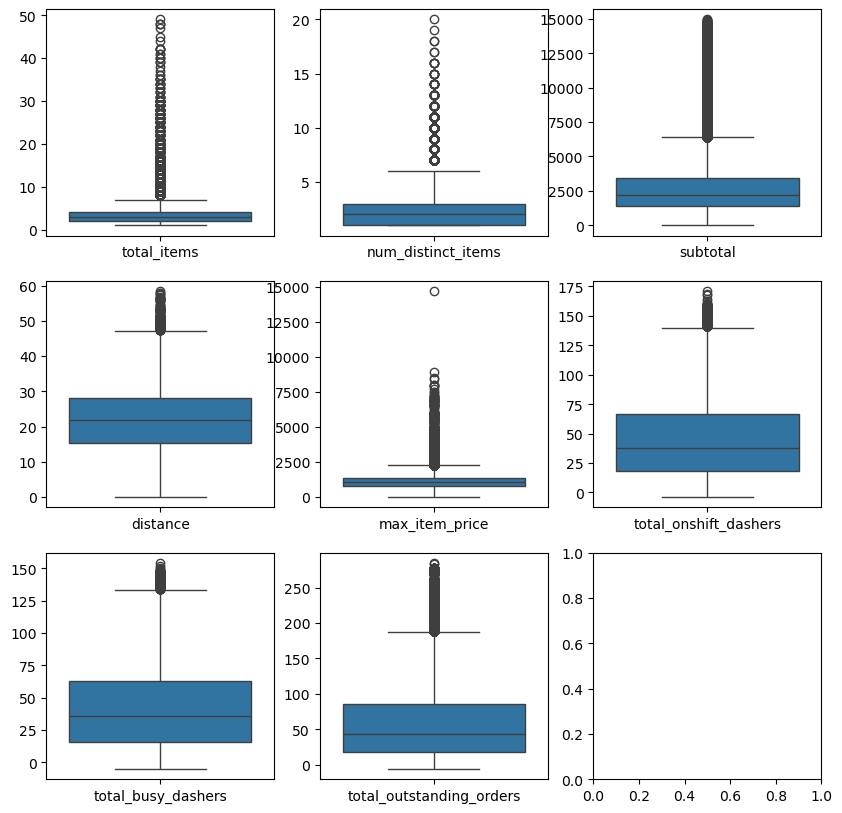

In [2100]:
# deleting outliers and then replotting
df_train = df_train[df_train['total_items'] < 50]
df_train = df_train[df_train['subtotal'] < 15000]
df_train = df_train[df_train['distance'] < 60]

fig, axes = plt.subplots(3, 3,figsize=(10, 10))
sns.boxplot(df_train[['total_items']], ax=axes[0][0])
sns.boxplot(df_train[['num_distinct_items']], ax=axes[0][1])
sns.boxplot(df_train[['subtotal']], ax=axes[0][2])
sns.boxplot(df_train[['distance']], ax=axes[1][0])
sns.boxplot(df_train[['max_item_price']], ax=axes[1][1])
sns.boxplot(df_train[['total_onshift_dashers']], ax=axes[1][2])
sns.boxplot(df_train[['total_busy_dashers']], ax=axes[2][0])
sns.boxplot(df_train[['total_outstanding_orders']], ax=axes[2][1])

plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [2102]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

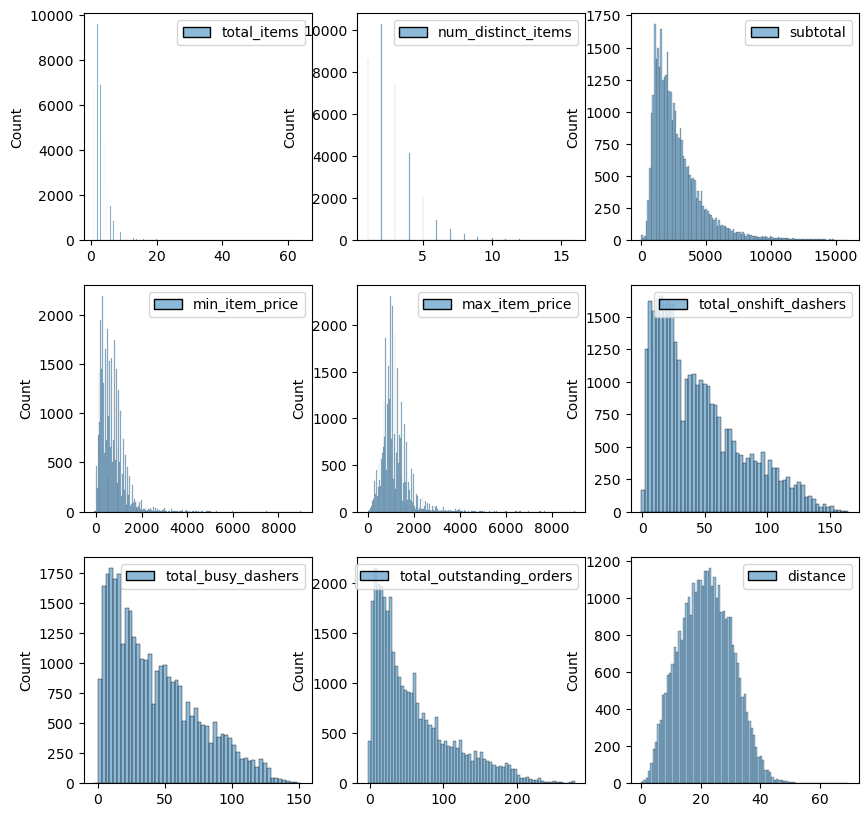

In [2106]:
# Plot distributions for all numerical columns
fig, axes = plt.subplots(3, 3,figsize=(10, 10))
sns.histplot(df_test[['total_items']], ax=axes[0][0])
sns.histplot(df_test[['num_distinct_items']], ax=axes[0][1])
sns.histplot(df_test[['subtotal']], ax=axes[0][2])
sns.histplot(df_test[['min_item_price']], ax=axes[1][0])
sns.histplot(df_test[['max_item_price']], ax=axes[1][1])
sns.histplot(df_test[['total_onshift_dashers']], ax=axes[1][2])
sns.histplot(df_test[['total_busy_dashers']], ax=axes[2][0])
sns.histplot(df_test[['total_outstanding_orders']], ax=axes[2][1])
sns.histplot(df_test[['distance']], ax=axes[2][2])

plt.show()


##### **4.1.2**
Check the distribution of categorical features

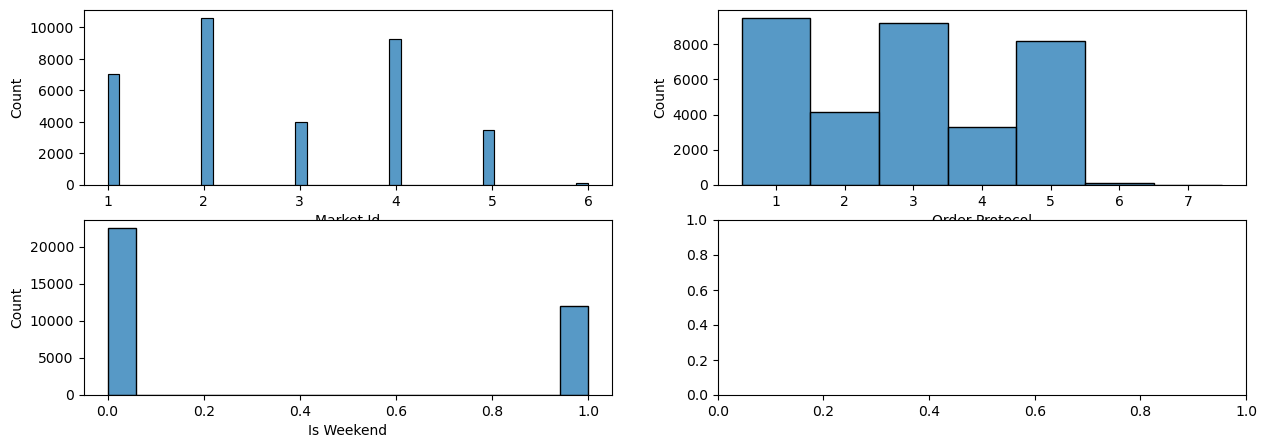

In [2108]:
# Distribution of categorical columns
fig, axes = plt.subplots(2, 2, figsize=(15, 5)) # Adjust figure size for better view 

sns.histplot(data=df_test['market_id'], ax=axes[0][0])
axes[0][0].set_xlabel('Market Id')

sns.histplot(data=df_test['order_protocol'], ax=axes[0][1])
axes[0][1].set_xlabel('Order Protocol')

sns.histplot(data=df_test['is_weekend'], ax=axes[1][0])
axes[1][0].set_xlabel('Is Weekend')

plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

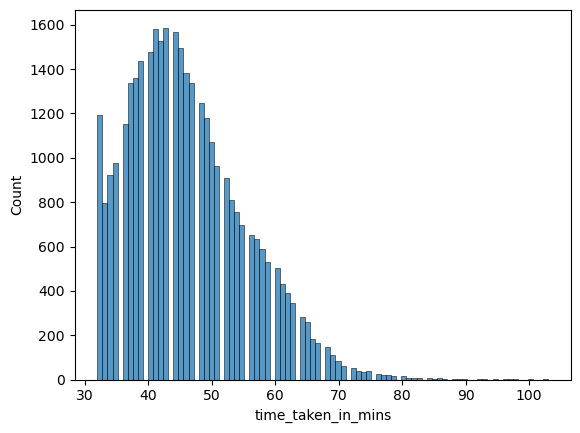

In [2114]:
# Distribution of time_taken

sns.histplot(data=df_test['time_taken_in_mins'])

plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

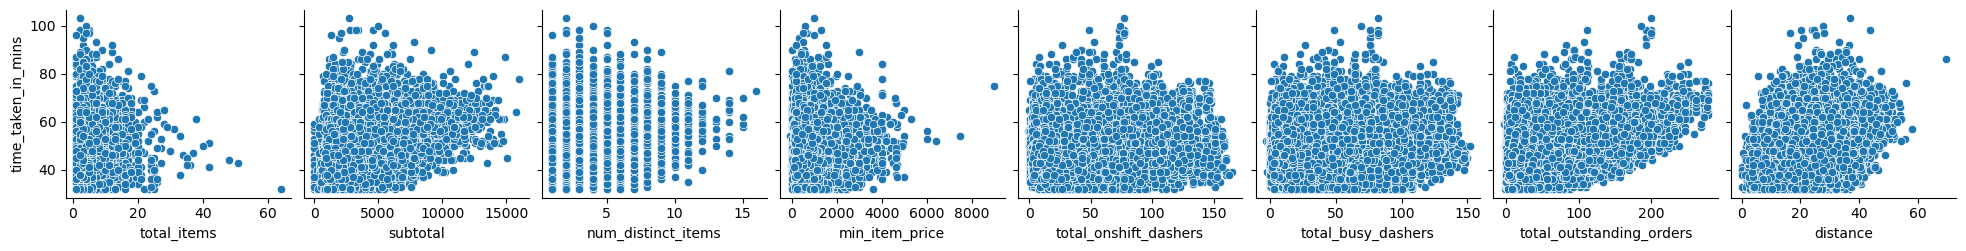

In [2117]:
# Scatter plot to visualise the relationship between time_taken and other features
sns.pairplot(df_test, x_vars=['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'total_onshift_dashers', 
                         'total_busy_dashers', 'total_outstanding_orders', 'distance'], y_vars=['time_taken_in_mins'])
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [2120]:
# Drop the weakly correlated columns from training dataset
df_test = df_test.drop(columns=['market_id', 'store_primary_category', 'min_item_price', 'order_protocol', 'is_weekend'])

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [2124]:
# Import libraries
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [2127]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()
num_vars = ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers','total_busy_dashers', 
            'total_outstanding_orders', 'distance', 'time_taken_in_mins']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [2132]:
# Create/Initialise the model
lm = LinearRegression()
y_train = df_train['time_taken_in_mins']
X_train = df_train[list(filter(lambda col : col not in ['time_taken_in_mins'], df_train.columns))]
y_test = df_test['time_taken_in_mins']
X_test = df_test[list(filter(lambda col : col not in ['time_taken_in_mins'], df_test.columns))]

In [2134]:
# Train the model using the training data
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()

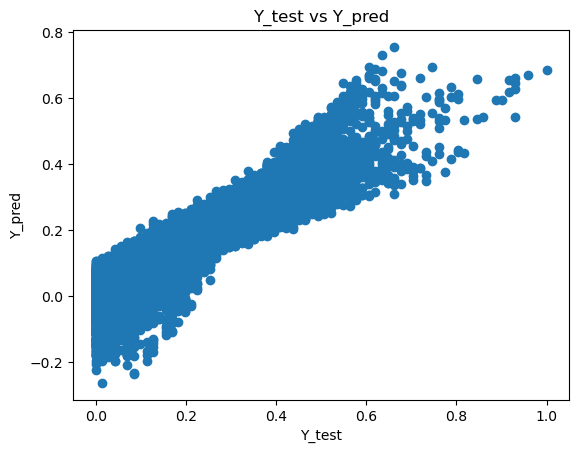

In [2136]:
# Make predictions
X_test_lm = sm.add_constant(X_test)
y_pred = lm.predict(X_test_lm)
plt.title('Y_test vs Y_pred')
plt.scatter(x=y_test, y=y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [2138]:
# Find results for evaluation metrics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_in_mins   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 9.421e+04
Date:                Sat, 24 May 2025   Prob (F-statistic):               0.00
Time:                        18:40:43   Log-Likelihood:             2.3259e+05
No. Observations:              137787   AIC:                        -4.652e+05
Df Residuals:                  137777   BIC:                        -4.651e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0360      0.001     69.933      0.000       0.035       0.037
total_items                 -0.0424      0.004     -9.837      0.000      -0.051      -0.034
subtotal                     0.2454      0.002    131.451      0.000       0.242       0.249
num_distinct_items           0.1384      0.003     50.371      0.000       0.133       0.144
max_item_price               0.1640      0.004     37.099      0.000       0.155       0.173
total_onshift_dashers       -0.8270      0.002   -397.895      0.000      -0.831      -0.823
total_busy_dashers          -0.2859      0.002   -145.329      0.000      -0.290      -0.282
total_outstanding_orders     1.3027      0.002    628.267      0.000       1.299       1.307
distance                     0.3556      0.001    440.490      0.000       0.354       0.357
hour                        -0.0032   1.53e-05   -209.041      0.000      -0.003      -0.003
==============================================================================
Omnibus:                    37619.712   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139023.368
Skew:                           1.339   Prob(JB):                         0.00
Kurtosis:                       7.128   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2140]:
# function to calculate VIF
def calculate_VIF(X_train):
    vif_df = pd.DataFrame()
    vif_df["feature"] = X_train.columns
    vif_df["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    return vif_df


In [2142]:
# VIF for current model
calculate_VIF(X_train)

feature        VIF
0               total_items   5.932540
1                  subtotal  11.157404
2        num_distinct_items   7.706989
3            max_item_price   8.213500
4     total_onshift_dashers  35.060527
5        total_busy_dashers  34.320626
6  total_outstanding_orders  24.352320
7                  distance   5.000294
8                      hour   1.835975

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [2147]:
# As can be seen few features have very high VIF, and we also have seen very correlation b/w those. So combining them
df_train['orderPerDasher'] = df_train['total_outstanding_orders']/(df_train['total_onshift_dashers']+df_train['total_busy_dashers'])
df_train['orderPerDasher'] = scaler.fit_transform(df_train[['orderPerDasher']])

In [2153]:
# Loop through the number of features and test the model
# We see a high VIF for total_onshift_dashers hence dropping that
X_train = df_train[list(filter(lambda col : col not in ['time_taken_in_mins', 'total_outstanding_orders',
                                                        'total_onshift_dashers', 'total_busy_dashers'], df_train.columns))]
X_train_lm = sm.add_constant(X_train)

In [2155]:
lm_2 = sm.OLS(y_train, X_train_lm).fit()
print(lm_2.summary())
calculate_VIF(X_train)

                            OLS Regression Results                            
Dep. Variable:     time_taken_in_mins   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                 6.830e+04
Date:                Sat, 24 May 2025   Prob (F-statistic):               0.00
Time:                        18:41:34   Log-Likelihood:             2.0019e+05
No. Observations:              137787   AIC:                        -4.004e+05
Df Residuals:                  137779   BIC:                        -4.003e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2943      0

feature        VIF
0         total_items   5.986574
1            subtotal  11.223746
2  num_distinct_items   7.742292
3      max_item_price   9.214759
4            distance   5.984359
5                hour   1.790078
6      orderPerDasher   8.416982

In [2157]:

X_train = df_train[list(filter(lambda col : col not in ['time_taken_in_mins', 'total_outstanding_orders',
                                                        'total_onshift_dashers', 'total_busy_dashers', 'subtotal'], 
                               df_train.columns))]
X_train_lm = sm.add_constant(X_train)

lm_3 = sm.OLS(y_train, X_train_lm).fit()
print(lm_3.summary())
calculate_VIF(X_train)

                            OLS Regression Results                            
Dep. Variable:     time_taken_in_mins   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 7.302e+04
Date:                Sat, 24 May 2025   Prob (F-statistic):               0.00
Time:                        18:44:10   Log-Likelihood:             1.9556e+05
No. Observations:              137787   AIC:                        -3.911e+05
Df Residuals:                  137780   BIC:                        -3.910e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3023      0

feature       VIF
0         total_items  5.527167
1  num_distinct_items  6.429463
2      max_item_price  4.909405
3            distance  5.982296
4                hour  1.776993
5      orderPerDasher  8.362084

In [2179]:
# Build the final model with selected number of features
# Final Model is lm_3
lm_3.params

const                -0.302289
total_items           0.132033
num_distinct_items    0.276804
max_item_price        0.520246
distance              0.351962
hour                 -0.002076
orderPerDasher        0.858208
dtype: float64

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [2211]:
X_train = df_train[list(filter(lambda col : col not in ['time_taken_in_mins', 'total_outstanding_orders',
                                                        'total_onshift_dashers', 'total_busy_dashers', 'subtotal'], 
                               df_train.columns))]
X_train_lm = sm.add_constant(X_train)

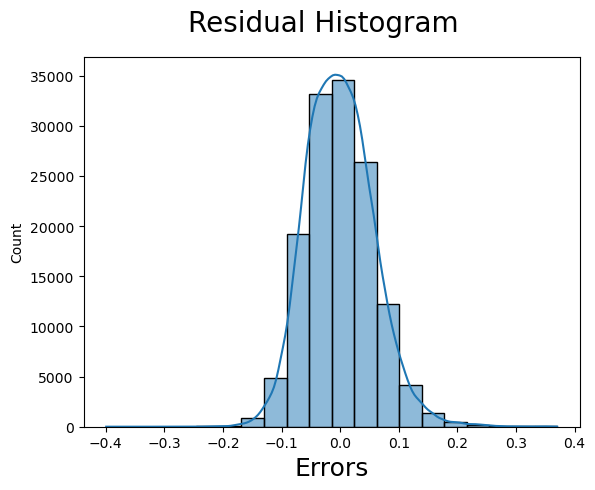

In [2262]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Residual histogram
y_train_pred = lm_3.predict(X_train_lm)
fig = plt.figure()
sns.histplot((y_train - y_train_pred), bins = 20, kde=True)
fig.suptitle('Residual Histogram', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

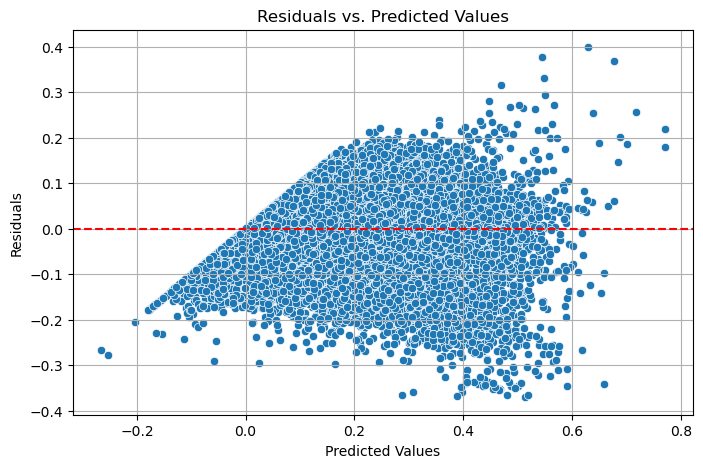

In [2215]:
# Residuals vs predicted values
residuals = y_train_pred - y_train
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()

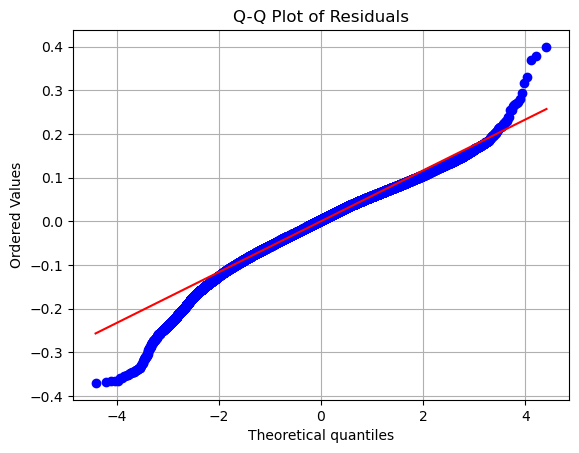

In [2217]:
# Q-Q plot
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [2241]:
# Compare the scaled vs unscaled features used in the final model
print('scaled Coefficients : \n', lm_3.params)
feature_range = scaler.data_max_ - scaler.data_min_
coef_unscaled = lm_3.params/feature_range
print('unscaled Coefficients : \n', coef_unscaled)
print('unscaled intercept : ', lm_3.params['const'] - np.sum(lm_3.params['const'] * scaler.data_min_))

scaled Coefficients : 
 const                -0.302289
total_items           0.132033
num_distinct_items    0.276804
max_item_price        0.520246
distance              0.351962
hour                 -0.002076
orderPerDasher        0.858208
dtype: float64
unscaled Coefficients : 
 const                -0.247211
total_items           0.107976
num_distinct_items    0.226370
max_item_price        0.425456
distance              0.287834
hour                 -0.001698
orderPerDasher        0.701841
dtype: float64
unscaled intercept :  -0.3022890189355592


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'
# total items previously was 0.13 and as part of unscaled coeffecients it reduced to 0.107


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes, there are 3 categorical values. market_id, store_primary_category and order_protocol. These values do not have consistent effect, and the mean varies b/w timetaken among these values. 

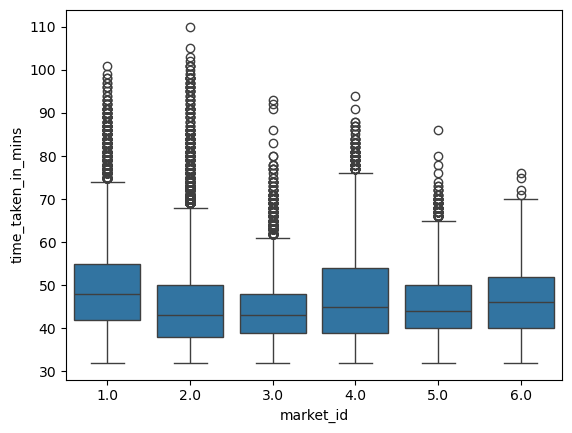

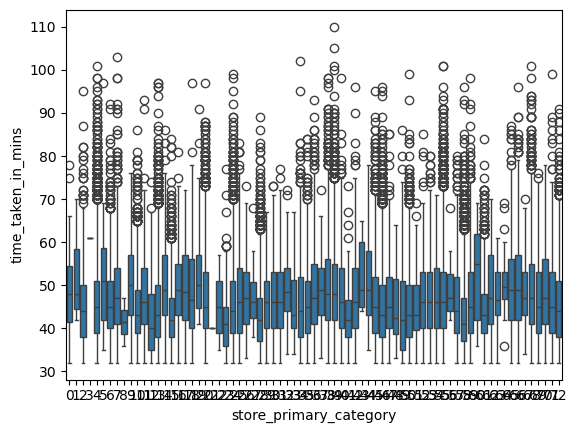

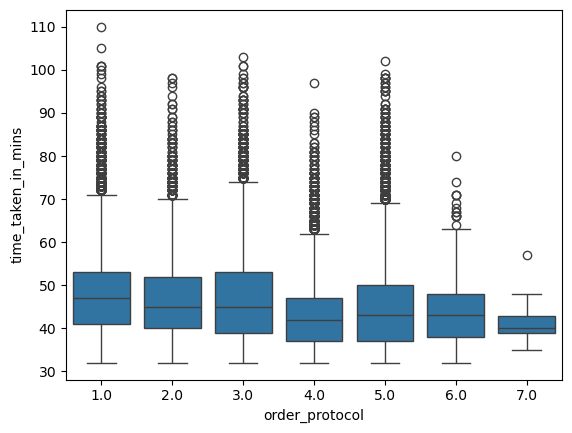

In [2252]:
sns.boxplot(df, x = 'market_id', y='time_taken_in_mins')
plt.show()
sns.boxplot(df, x = 'store_primary_category', y='time_taken_in_mins')
plt.show()
sns.boxplot(df, x = 'order_protocol', y='time_taken_in_mins')
plt.show()



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> This denotes that we would be taking 20% of the data for validating our model and rest 80% of the data will be used for generating the model



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Distance has the highest correlation with the target variable, which is expected as well. Since as the distance increases so should the time taken in mins

---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> For outliers, I plotted the boxplot for the spread of each value and from the boxplot, we could make an estimate which values seem like an outliers. All the outlier values were discarded from the dataset.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on the final model, we see orderPerDasher, max_item_price and distance are the three features which have the highest effect on the delivery time. This inference is based on the high coefficients of these features



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear regression algorithm is a supervised learning model to explain relationship b/w a target variable and one or more dependent variables. It depends on the following assumption
> 1. Relationship b/w target variable and dependent variable is linear
> 2. Residuals have mean of 0 and are normally distributed
> 3. Independent variables should not be highly correlated
> 4. Constant variance of residuals




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple linear regression has one dependent variable and one target variable. Where as multiple linear regression has more than one dependent variable



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> role of cost function is to determine the variation b/w predicted values and the actual values in the model. for linear regression this value is mean squared error. It is minimized using iterative optimization.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting means that model very closely follows the training data and it too complex, and hence when new values are provided to it, it fails to predict the right outcomes. Underfitting on the other hand keeps the model too simple and tris to fit linear line to a non-linear problem



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual plots help in checking the variation of predicted data along with residuals. if the plot has random scatter around 0 , it means that linear regression fits the data, there is constant variance of errors, and there are no patterns in errors